In [ ]:
import cv2
import numpy as np

def flood_fill4(l, x, y, label):
    if l[x, y] == -1:  # 아직 번호를 안 붙인 화소이면
        l[x, y] = label
        flood_fill4(l, x+1, y, label)  # east
        flood_fill4(l, x, y-1, label)  # north
        flood_fill4(l, x-1, y, label)  # west
        flood_fill4(l, x, y+1, label)  # south

def label_image(b):
    M, N = b.shape
    l = np.where(b == 1, -1, 0)  # 0은 0으로, 1은 -1로 복사함
    l[0, :] = l[:, 0] = l[-1, :] = l[:, -1] = 0  # 경계를 0으로 설정함

    label = 1
    for j in range(1, M-1):
        for i in range(1, N-1):
            if l[j, i] == -1:
                flood_fill4(l, j, i, label)
                label += 1

    return l

# 이미지 불러오기
image = cv2.imread('./image/lena.bmp', cv2.IMREAD_GRAYSCALE)

# 이진화
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 이진 영상을 0과 1로 변환
binary_image = binary_image // 255

# Maximum Recursion error  
labeled_image = label_image(binary_image)

print(labeled_image)

# 라벨링 결과 시각화 (원본 이미지와 동일한 크기로 확장)
output_image = np.zeros_like(image)
output_image[binary_image == 1] = 255
output_image[labeled_image > 0] = 127  # 라벨이 붙은 영역을 회색으로 표시

# 결과 저장
cv2.imwrite('labeled_image.jpg', output_image)

# 결과 출력 (화면에 표시)
cv2.imshow('Labeled Image', output_image)


RecursionError: maximum recursion depth exceeded

Fix verison 

[[ 0  0  0 ...  0  0  0]
 [ 0  1  1 ... 14 14  0]
 [ 0  1  1 ... 14 14  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


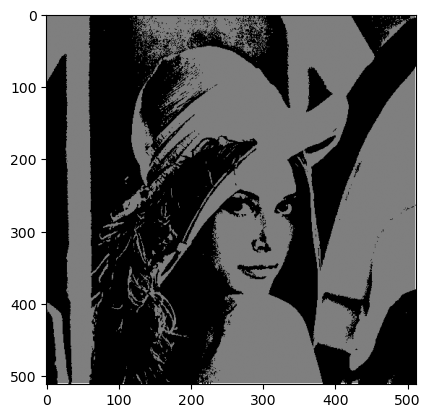

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def efficient_floodfill4(l, j, i, label):
    Q = []
    Q.append((j, i))
    while Q:
        y, x = Q.pop()
        if l[y, x] == -1:
            left = right = x
            while l[y, left-1] == -1: left -= 1
            while l[y, right+1] == -1: right += 1
            for c in range(left, right+1):
                l[y, c] = label
                if l[y-1, c] == -1 and (c == left or l[y-1, c-1] != -1):
                    Q.append((y-1, c))
                if l[y+1, c] == -1 and (c == left or l[y+1, c-1] != -1):
                    Q.append((y+1, c))

def label_image(b):
    M, N = b.shape
    l = np.where(b == 1, -1, 0)
    l[0, :] = l[:, 0] = l[-1, :] = l[:, -1] = 0

    label = 1
    for j in range(1, M-1):
        for i in range(1, N-1):
            if l[j, i] == -1:
                efficient_floodfill4(l, j, i, label)
                label += 1

    return l

# 이미지 불러오기
image = cv2.imread('./image/lena.bmp', cv2.IMREAD_GRAYSCALE)

# 이진화
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 이진 영상을 0과 1로 변환
binary_image = binary_image // 255

labeled_image = label_image(binary_image)

print(labeled_image)

# 라벨링 결과 시각화 (원본 이미지와 동일한 크기로 확장)
output_image = np.zeros_like(image)
output_image[binary_image == 1] = 255
output_image[labeled_image > 0] = 127  # 라벨이 붙은 영역을 회색으로 표시

# 결과 출력 (화면에 표시)
plt.imshow(output_image, cmap='gray')